# Домашняя работа №3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [2]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


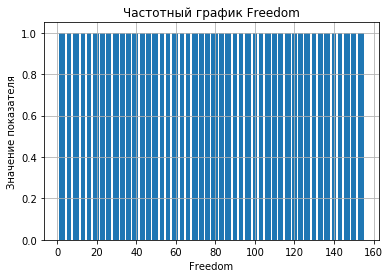

In [4]:
plt.hist(df['Freedom'],200)
plt.xlabel('Freedom')
plt.ylabel('Значение показателя')
plt.title('Частотный график Freedom')
plt.grid(True)
plt.show()

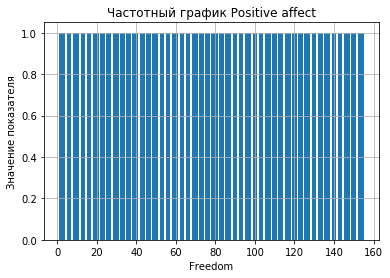

In [5]:
plt.hist(df['Positive affect'],200)
plt.xlabel('Freedom')
plt.ylabel('Значение показателя')
plt.title('Частотный график Positive affect')
plt.grid(True)
plt.show()

# На обоих графиках показано равномерное распределение

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [6]:
print('Медиана =', df['Freedom'].median())

Медиана = 78.0


In [7]:
print('Мода = ', df['Freedom'].mode())

Мода =  0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
       ...  
150    151.0
151    152.0
152    153.0
153    154.0
154    155.0
Length: 155, dtype: float64


In [8]:
print('Среднеквадратическое отклонение =',df['Freedom'].std(ddof=0))

Среднеквадратическое отклонение = 44.74371464239419


In [9]:
print('Дисперсия =',df['Freedom'].var(ddof=0))

Дисперсия = 2002.0


In [10]:
#также так можно средневадратическое посчитать
statistics.pstdev(df['Freedom'].dropna())

44.74371464239419

In [11]:
#также так можно средневадратическое посчитать
def stdev(nums):
    diffs = 0
    # считаем среднее значение
    avg = sum(nums)/len(nums)
    for n in nums:
        # считаем сумму квадратичных отклонений
        diffs += (n - avg)**(2)
    # считаем корень среднеквадратичного значения
    return (diffs/(len(nums)-1))**(0.5)

print(stdev(df['Freedom'].dropna()))

44.88875137492688


In [12]:
#также так можно среднее посчитать
avg = sum(df['Freedom'].dropna())/len(df['Freedom'].dropna())
print(avg)

78.0


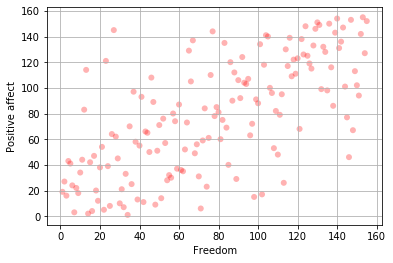

In [13]:
#На графике можно видеть, что выбросов нет

Outliers = df['Freedom']
year = df['Positive affect']
fig, ax = plt.subplots()
ax.scatter(Outliers, year, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.show()

In [14]:
df['Freedom'].mean()

78.0

In [15]:
print('Максимальнное значение =', df['Freedom'].max())

Максимальнное значение = 155.0


In [16]:
print('Максимальнное значение =', df['Freedom'].min())

Максимальнное значение = 1.0


In [17]:
print('Размах =', df['Freedom'].max() - df['Freedom'].min())

Размах = 154.0


Почему нельзя найти моду?

# Ответ
Моду нельзя найти потому что все значения по этой колонке представлены числами от 1 до 155 с интервалом 1. 
Нету повторяющихся значений

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

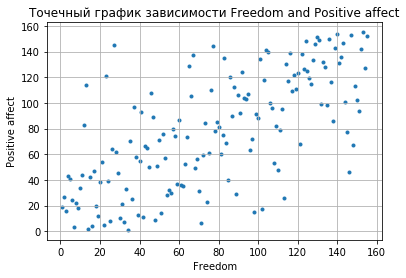

In [18]:
freedom = df['Freedom'].dropna()
positive = df['Positive affect'].dropna()
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.title('Точечный график зависимости Freedom and Positive affect')
plt.grid(True)
plt.scatter(freedom, positive, marker='.')

Коэффициент корреляции Пирсона: 0.6817698430601656


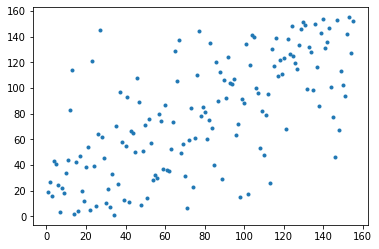

In [19]:
from scipy.stats import pearsonr
x = df['Freedom'].dropna()
y = df['Positive affect'].dropna()

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)
#Корреляция пирсона = 0.68 - средняя корреляция. Показатели Freeedom and Positive affect коррелируют друг с другом, но не сильно

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [20]:
Freedom = df['Freedom'].dropna()
print(statistics.mean(Freedom))

78.0


In [21]:
Freedom_1 = Freedom - statistics.mean(Freedom)
print(statistics.mean(Freedom_1))

0.0


In [22]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

Freedom_2 = min_max_scaler.fit_transform(np.array(Freedom_1).reshape(-1, 1))
print(min(Freedom_2))
print(max(Freedom_2))

[-1.]
[1.]


In [23]:
Freedom_2

array([[-0.94805195],
       [-0.93506494],
       [-0.97402597],
       [-0.92207792],
       [-0.76623377],
       [-0.87012987],
       [-0.88311688],
       [-0.90909091],
       [-0.8961039 ],
       [-0.67532468],
       [-0.79220779],
       [-0.80519481],
       [ 0.19480519],
       [-0.64935065],
       [-0.19480519],
       [-0.58441558],
       [-0.44155844],
       [-0.32467532],
       [-0.20779221],
       [-0.25974026],
       [-0.96103896],
       [-0.85714286],
       [-0.09090909],
       [-0.11688312],
       [ 0.31168831],
       [ 0.25974026],
       [-0.68831169],
       [-0.12987013],
       [ 0.22077922],
       [-0.5974026 ],
       [ 0.07792208],
       [-0.62337662],
       [-0.75324675],
       [-0.05194805],
       [ 0.7012987 ],
       [-0.7012987 ],
       [ 0.38961039],
       [-0.35064935],
       [-0.33766234],
       [-1.        ],
       [ 0.57142857],
       [-0.28571429],
       [-0.84415584],
       [-0.1038961 ],
       [-0.36363636],
       [-0

Построить матрицу корреляций для всех колонок таблицы

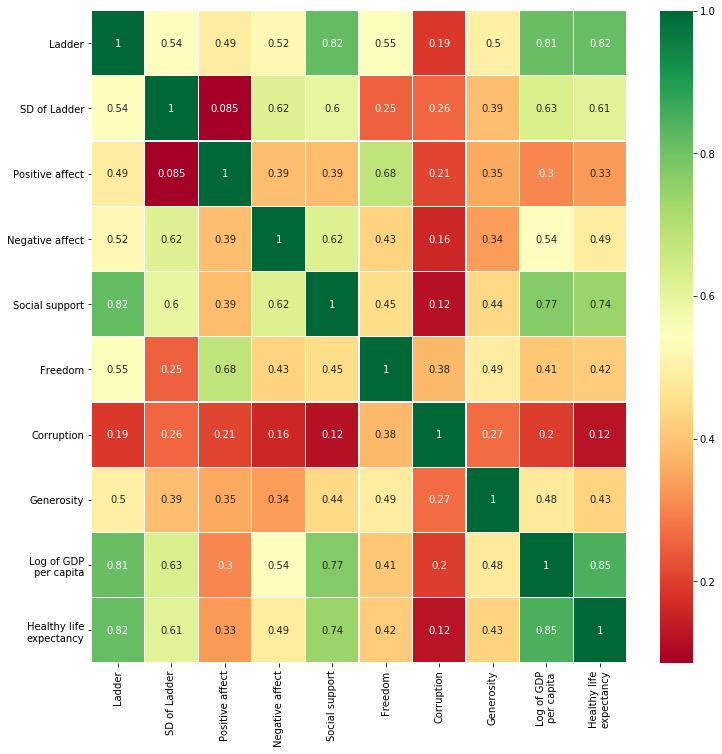

In [24]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [25]:
df2=pd.read_csv('data/avocado.csv')
df2[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

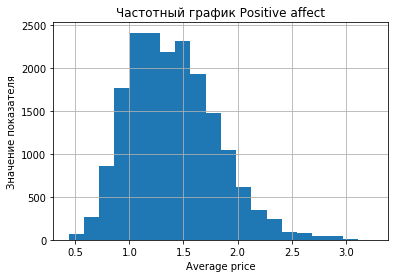

In [26]:
plt.hist(df2['AveragePrice'],20)
plt.xlabel('Average price')
plt.ylabel('Значение показателя')
plt.title('Частотный график Positive affect')
plt.grid(True)
plt.show()

#Правобокое нормальное распределение

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

Коэффициент корреляции Пирсона: -0.2083170484878848


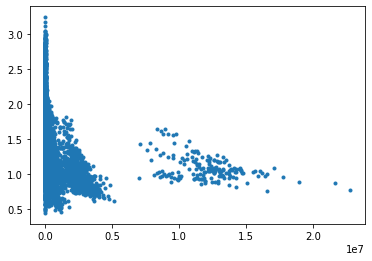

In [27]:
x = df2['4046'].dropna()
y = df2['AveragePrice'].dropna()

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: -0.1729277725093354


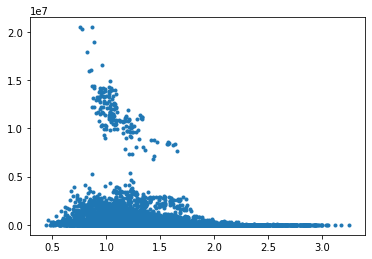

In [28]:
x = df2['AveragePrice'].dropna()
y = df2['4225'].dropna()

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: -0.1794459839797562


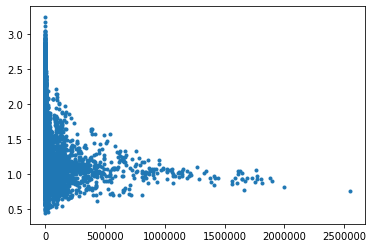

In [29]:
x = df2['4770'].dropna()
y = df2['AveragePrice'].dropna()

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: 0.9261099558992297


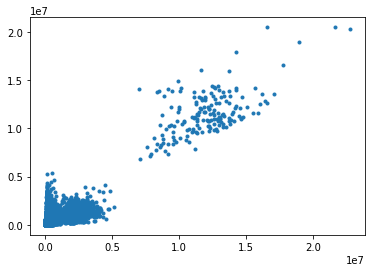

In [30]:
x = df2['4046'].dropna()
y = df2['4225'].dropna()

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: 0.8878549976059533


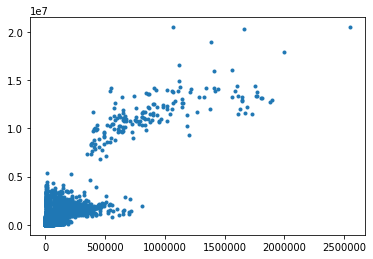

In [31]:
x = df2['4770'].dropna()
y = df2['4225'].dropna()

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

In [32]:
coef, p = sts.spearmanr(df2['AveragePrice'], df2['4770'])
print('Spearmans correlation coefficient: %.3f' % coef)

coef, p = sts.kendalltau(df2['AveragePrice'], df2['4770'])
print('Kendall correlation coefficient: %.3f' % coef)

coef, p = sts.spearmanr(df2['4225'], df2['4770'])
print('Spearmans correlation coefficient: %.3f' % coef)

Spearmans correlation coefficient: -0.533
Kendall correlation coefficient: -0.375
Spearmans correlation coefficient: 0.820


# Из вышеуказанных графиков можно сделать вывод что чем больше объем проданных авокадо, чем ниже средняя цена. 

Так как корреляция обратная

При этом корреляция не сильная.

При этом мы имеем сильную корреляцию между сортами авокадо с сортами 4770, 4225, 4046 - что может говорить о том что
данные сорта продаются с одинаковой частотой